I began by importing the dataset into my Python notebook, which consists of 23 columns and 38,984 rows. My research focuses on developing a predictive model for determining smoking status, with "Smoking" as the target variable. According to my dataset, this variable is a categorical variable that has values 1 & 0.

In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [2]:
#Import the dataset
df = pd.read_csv('train_dataset.csv')


In [3]:
#Read the first few columns of the dataset
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [4]:
#get the number of columns and rows of the dataset
df.shape

(38984, 23)

In [5]:
#Display the columns of the dataframe
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [6]:
# Display a summary of the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

Upon examining the dataset, I first checked the data types of all variables and confirmed that they are numerical. Subsequently, I conducted a thorough review of the summary statistics, which indicated the absence of any negative values. Further inspection for null values revealed no missing data throughout the dataset. While the dataset does not include any null values, it is possible that certain data points contain zeros. However, after analyzing the summary statistics, I can confirm that there are no instances where data values are observed as zero.

In [7]:
# Display descriptive statistics for all columns
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [8]:
#Display the descriptive statistics from 10th column
df.iloc[:,10:].describe()

,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,99.342269,196.883491,126.749461,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,20.642741,36.353945,71.803143,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,89.000000,172.000000,74.000000,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,104.000000,219.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,423.000000,445.000000,999.000000,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [9]:
#Count the number of missing values in each column
print(df.isnull().sum())

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


Upon reviewing the dataset, I initially found that all variables were classified as numerical. However, upon closer manual inspection of the dataset, I discovered several columns containing categorical values.Given this discovery, I need to change the data type of these variables to categorical. It's worth noting that my target variable is also categorical.

In [10]:
#Convert the columns to categorical
df['hearing(left)'] = df['hearing(left)'].astype('category')
df['hearing(right)'] = df['hearing(right)'].astype('category')
df['Urine protein'] = df['Urine protein'].astype('category')
df['dental caries'] = df['dental caries'].astype('category')
df['smoking'] = df['smoking'].astype('category')

In [11]:
#Check for the data types
df.dtypes

age                       int64
height(cm)                int64
weight(kg)                int64
waist(cm)               float64
eyesight(left)          float64
eyesight(right)         float64
hearing(left)          category
hearing(right)         category
systolic                  int64
relaxation                int64
fasting blood sugar       int64
Cholesterol               int64
triglyceride              int64
HDL                       int64
LDL                       int64
hemoglobin              float64
Urine protein          category
serum creatinine        float64
AST                       int64
ALT                       int64
Gtp                       int64
dental caries          category
smoking                category
dtype: object

In [12]:
#Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
#Get the numerical columns
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp'],
      dtype='object')

## Check for the outliers

After conducting an initial check for outliers using boxplots for each numerical variable, I observed significant outliers across all variables.

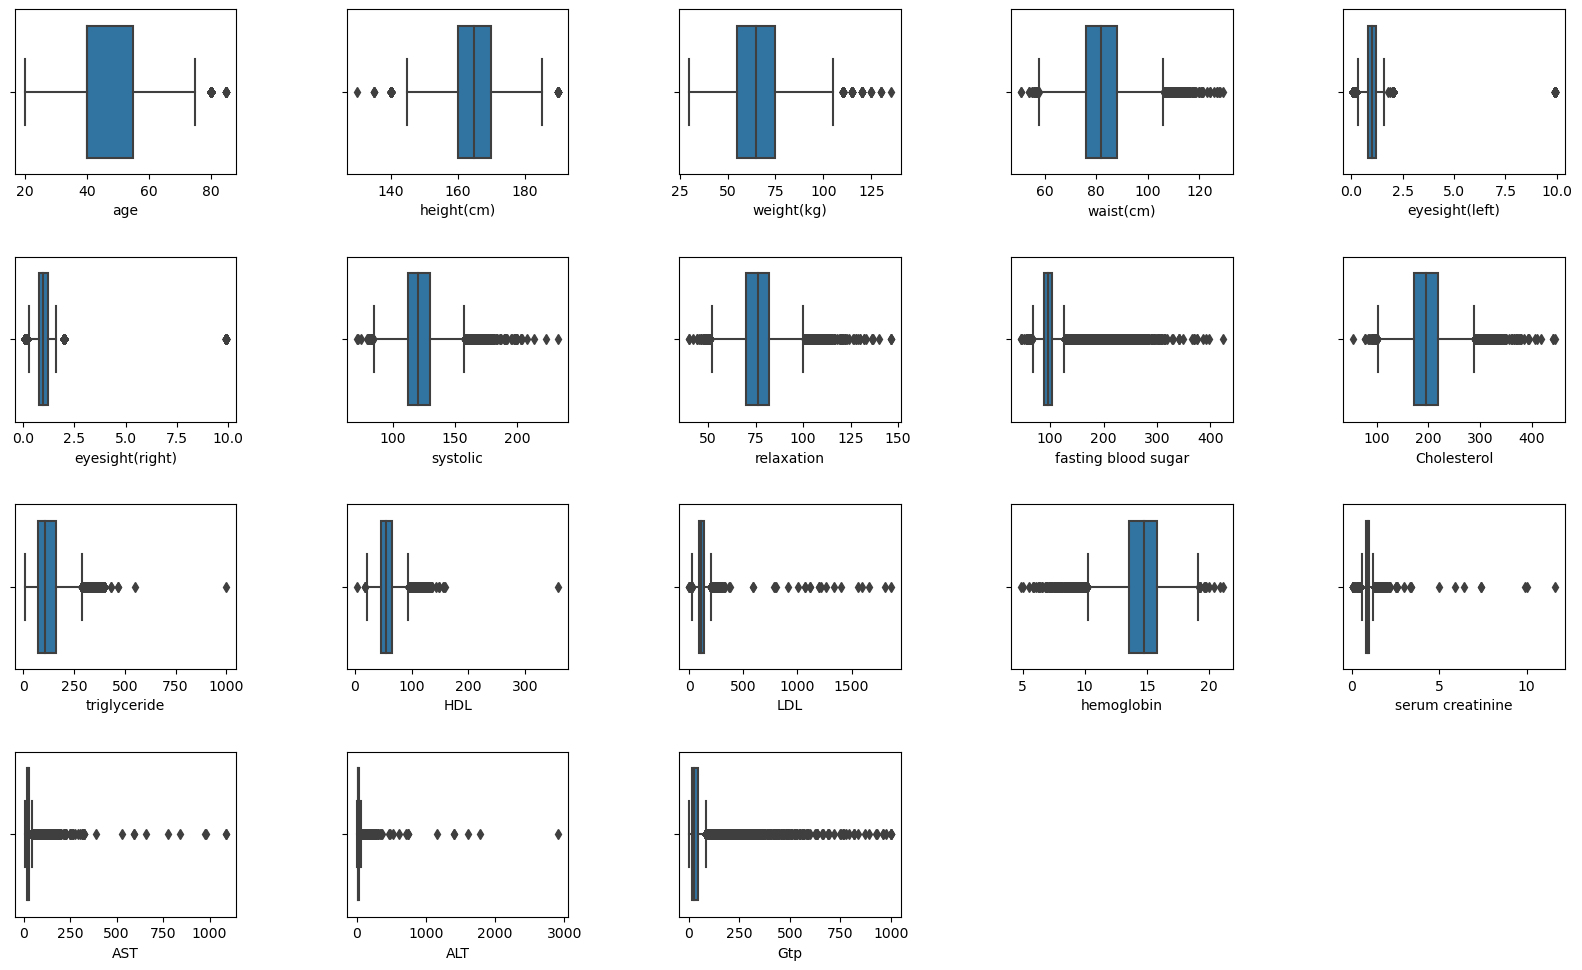

In [14]:
#Draw the boxplots to get the outliers
plt.figure(figsize=(20, 15))  
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    bp = sns.boxplot(x=df[col])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## Convert to log scale and check for the outliers

Concerned that removing outliers at this stage would drastically reduce the dataset size for modelling, I opted to assess outliers after transforming the dataset into a logarithmic scale.

In [15]:
#Convert to log scale 
for column in numerical_columns:
    df[column] = np.log(df[column]+1)
log_df=df
log_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,3.583519,5.141664,4.454347,4.584967,0.641854,0.641854,1,1,4.779123,4.369448,...,4.262680,4.962845,3.034953,1,0.693147,4.127134,4.753590,4.836282,1,1
1,3.044522,5.170484,4.709530,4.709530,0.530628,0.641854,1,1,4.787492,4.382027,...,4.276666,4.744932,2.827314,1,0.741937,2.995732,3.258097,3.433987,1,0
2,3.828641,5.049856,4.189655,4.465908,0.641854,0.641854,1,1,4.709530,4.394449,...,4.060443,4.727388,2.687847,3,0.470004,6.994850,7.244942,5.624018,0,0
3,3.828641,5.111988,4.394449,4.553877,0.587787,0.530628,1,1,5.068904,4.488636,...,3.850148,4.521789,2.884801,1,0.641854,3.496508,3.610918,3.610918,0,0
4,3.044522,5.111988,4.110874,4.406719,0.916291,0.095310,1,1,4.700480,4.174387,...,3.871201,4.532599,2.766319,1,0.788457,3.295837,3.367296,2.772589,0,0


In [16]:
#Get the number of rows and columns in the dataset
log_df.shape

(38984, 23)

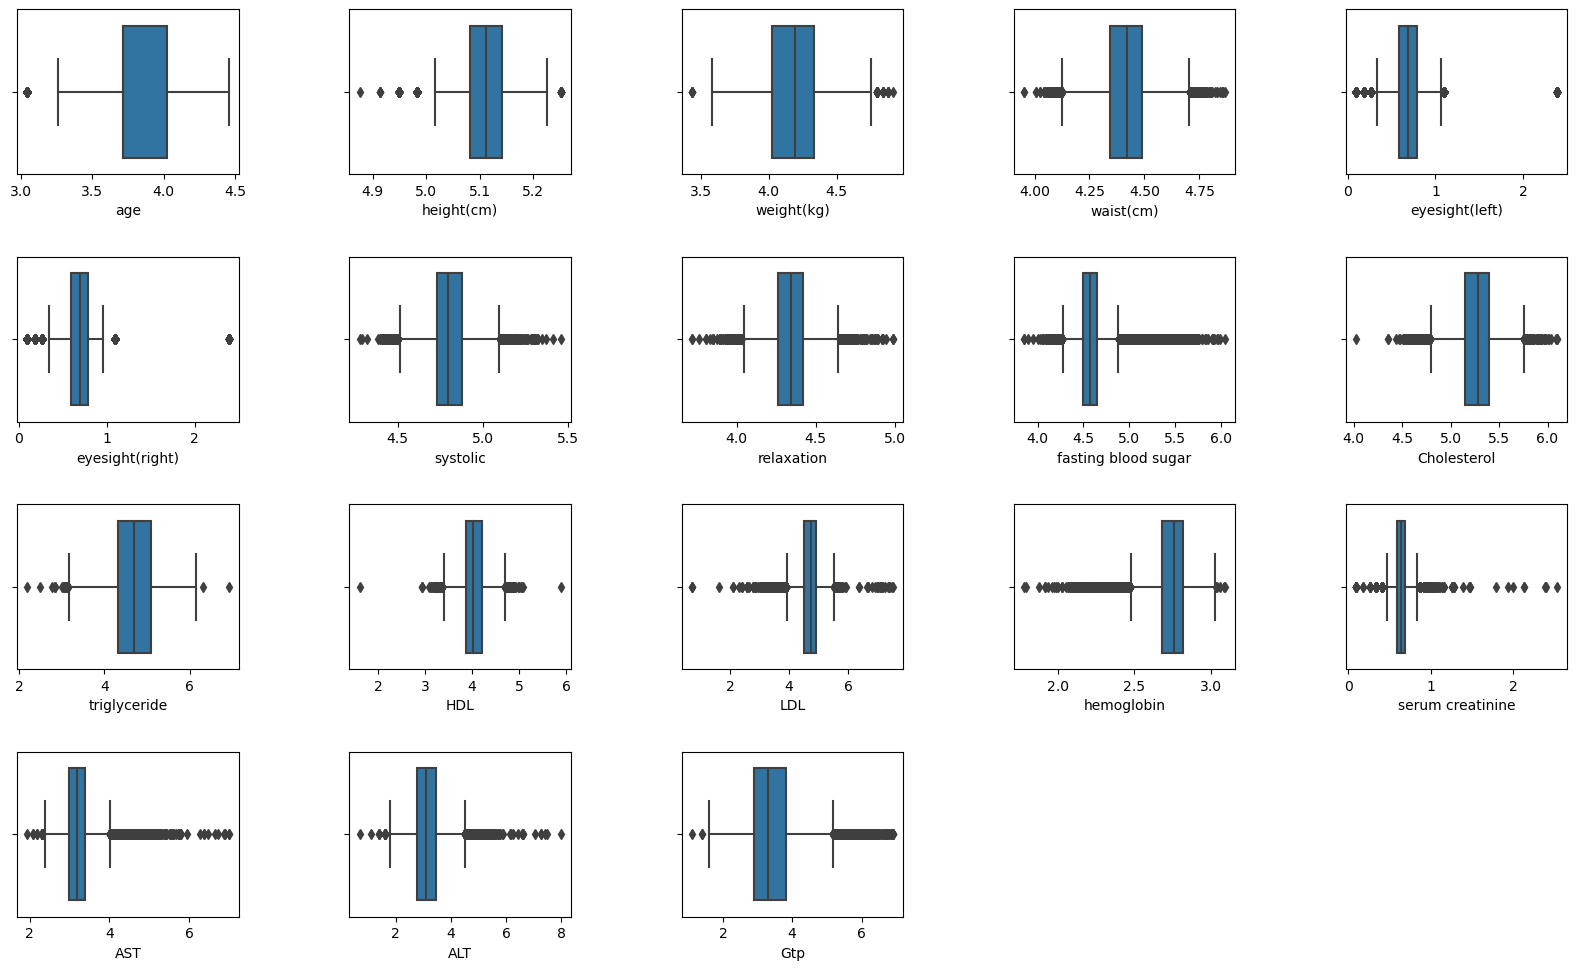

In [17]:
#Draw the boxplots again for the converted dataset
numerical_columns = log_df.select_dtypes(include='number').columns
plt.figure(figsize=(20, 15))  
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    bp = sns.boxplot(x=log_df[col])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


In [18]:
#Assign log_df to df
df=log_df

## Remove the outliers

Upon transforming the dataset, I noticed a reduction in the number of outliers. Subsequently, I employed the Interquartile Range (IQR) method to remove outliers. Following this process, I re-examined the boxplots for each variable and found that most variables were free of outliers. However, a few variables still exhibited one or two outliers.
Ex: age, waist, relaxation, fasting blood sugar, cholesterol, triglycerides, HDL, LDL, Hemoglobin, AST, ALT, GTP

In [19]:
#Remove the outliers using IQR 
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each numerical column
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)
    

# Display the DataFrame after removing outliers
print("\nDataFrame after removing outliers:")
df.head()


DataFrame after removing outliers:


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
5,4.110874,5.081404,3.931826,4.369448,0.693147,0.641854,2,2,4.844187,4.330733,...,4.595120,4.174387,2.701361,1,0.693147,3.871201,3.178054,4.262680,0,1
6,3.713572,5.170484,4.510860,4.564348,0.641854,0.693147,1,1,4.875197,4.488636,...,3.688879,4.634729,2.862201,1,0.693147,2.995732,3.135494,2.995732,0,0
9,3.828641,5.049856,4.025352,4.369448,0.530628,0.693147,1,1,4.744932,4.406719,...,3.737670,4.682131,2.646175,1,0.470004,3.135494,2.772589,4.043051,0,0
11,3.931826,5.049856,3.931826,4.290459,0.405465,0.587787,1,1,4.727388,4.174387,...,4.094345,4.248495,2.602690,1,0.641854,3.135494,2.564949,2.484907,0,0
12,3.931826,5.081404,4.110874,4.499810,0.587787,0.587787,1,1,4.836282,4.343805,...,4.477337,4.727388,2.624669,1,0.641854,3.178054,2.833213,2.397895,1,0


In [20]:
#check for the bounds of IQR
def find_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound,upper_bound

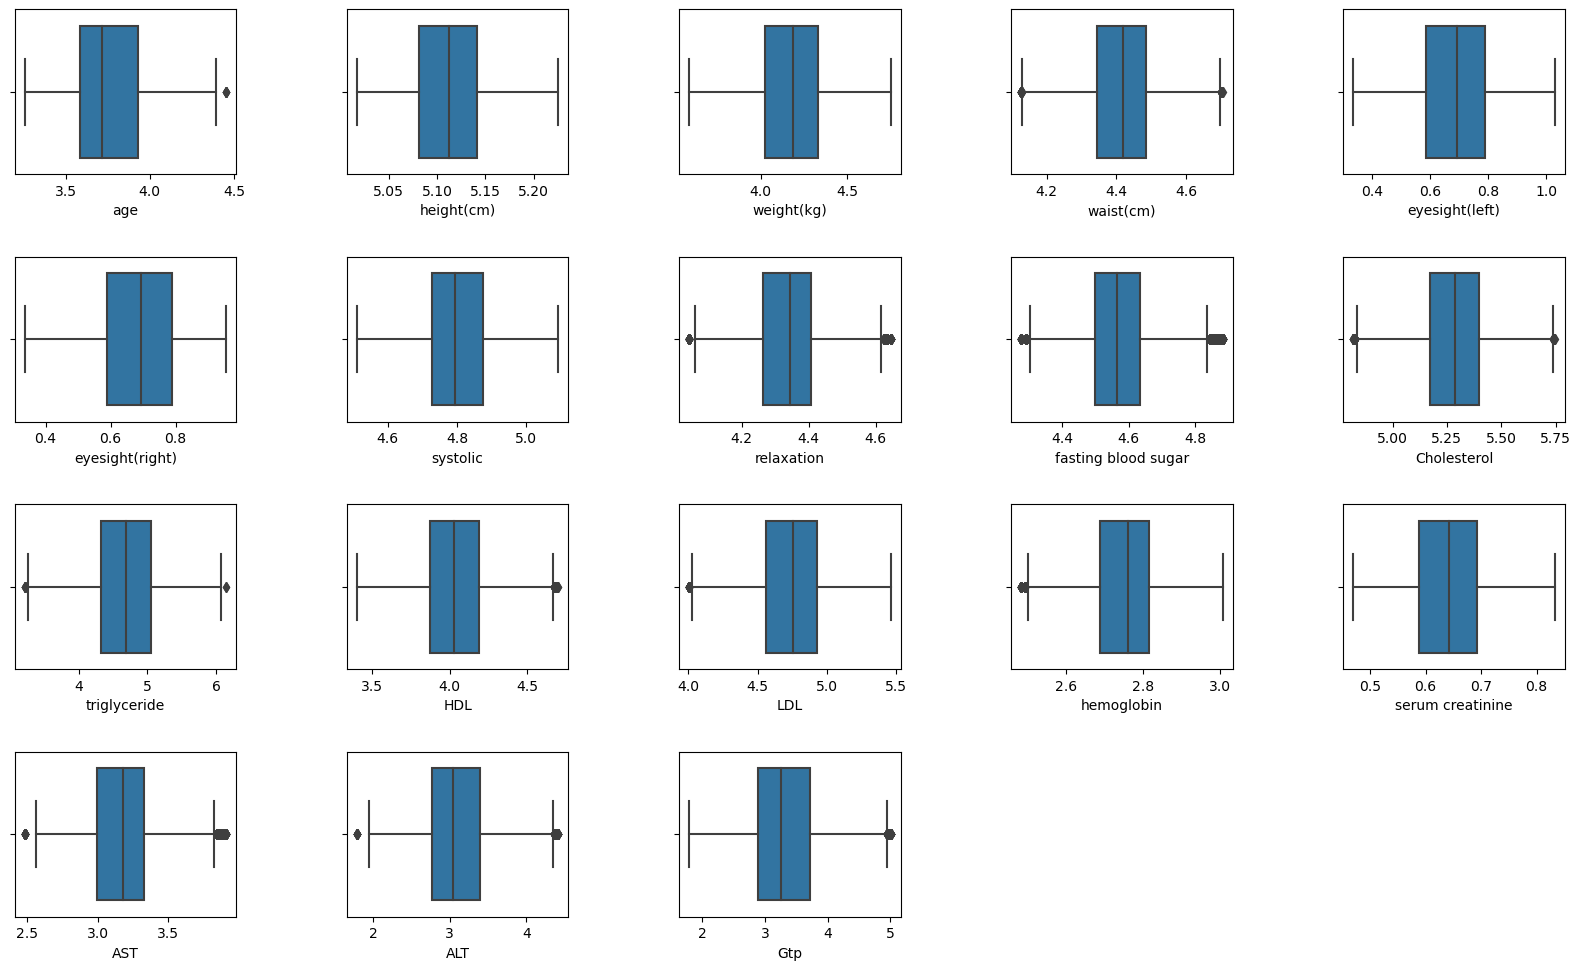

In [21]:
#Check for the outliers again for the outliers removed dataset
numerical_columns = df.select_dtypes(include='number').columns
plt.figure(figsize=(20, 15))  
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    bp = sns.boxplot(x=df[col])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

I proceeded to check the minimum and maximum values of each numerical variable with IQR upper and lower boundaries. Upon comparison, I found that the cleaned dataset fell within the Interquartile Range (IQR). This observation led me to conclude that there are no remaining outliers in the cleaned dataset.The cleaned dataset, now comprising 27,496 rows, was ready for further analysis.

In [22]:
#iterates over numerical columns in the DataFrame and prints information about the interquartile range bounds, as well as the minimum and maximum values for each column.
for col in numerical_columns:
    print(col,"lower bound:",round(find_iqr(log_df,col)[0],3),"upper bound:",round(find_iqr(log_df,col)[1],3),"min_value:",round(min(df[col]),3),"max_value:",round(max(df[col]),3))

age lower bound: 3.246 upper bound: 4.493 min_value: 3.258 max_value: 4.454
height(cm) lower bound: 4.991 upper bound: 5.232 min_value: 5.017 max_value: 5.226
weight(kg) lower bound: 3.567 upper bound: 4.789 min_value: 3.584 max_value: 4.754
waist(cm) lower bound: 4.127 upper bound: 4.706 min_value: 4.127 max_value: 4.705
eyesight(left) lower bound: 0.287 upper bound: 1.089 min_value: 0.336 max_value: 1.03
eyesight(right) lower bound: 0.287 upper bound: 1.089 min_value: 0.336 max_value: 0.956
systolic lower bound: 4.506 upper bound: 5.097 min_value: 4.511 max_value: 5.094
relaxation lower bound: 4.028 upper bound: 4.653 min_value: 4.043 max_value: 4.644
fasting blood sugar lower bound: 4.269 upper bound: 4.885 min_value: 4.277 max_value: 4.883
Cholesterol lower bound: 4.793 upper bound: 5.754 min_value: 4.82 max_value: 5.746
triglyceride lower bound: 3.172 upper bound: 6.227 min_value: 3.219 max_value: 6.146
HDL lower bound: 3.371 upper bound: 4.705 min_value: 3.401 max_value: 4.7
LDL 

In [23]:
#Get the shape of new dataset
df.shape

(27496, 23)

## Check for the Multicolinearity

After obtaining the cleaned dataset, I generated a heatmap. Since my target variable is categorical, I couldn't assess correlations between it and other variables using the heatmap. Based on the heatmap analysis, I observed strong correlations between the following pairs of variables.
            - Cholesterol and LDL
            - Waist and Weight
            - Relaxation and Systolic
            - ALT and AST


C:\Users\upekk\AppData\Local\Temp\ipykernel_19852\2470695435.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1)


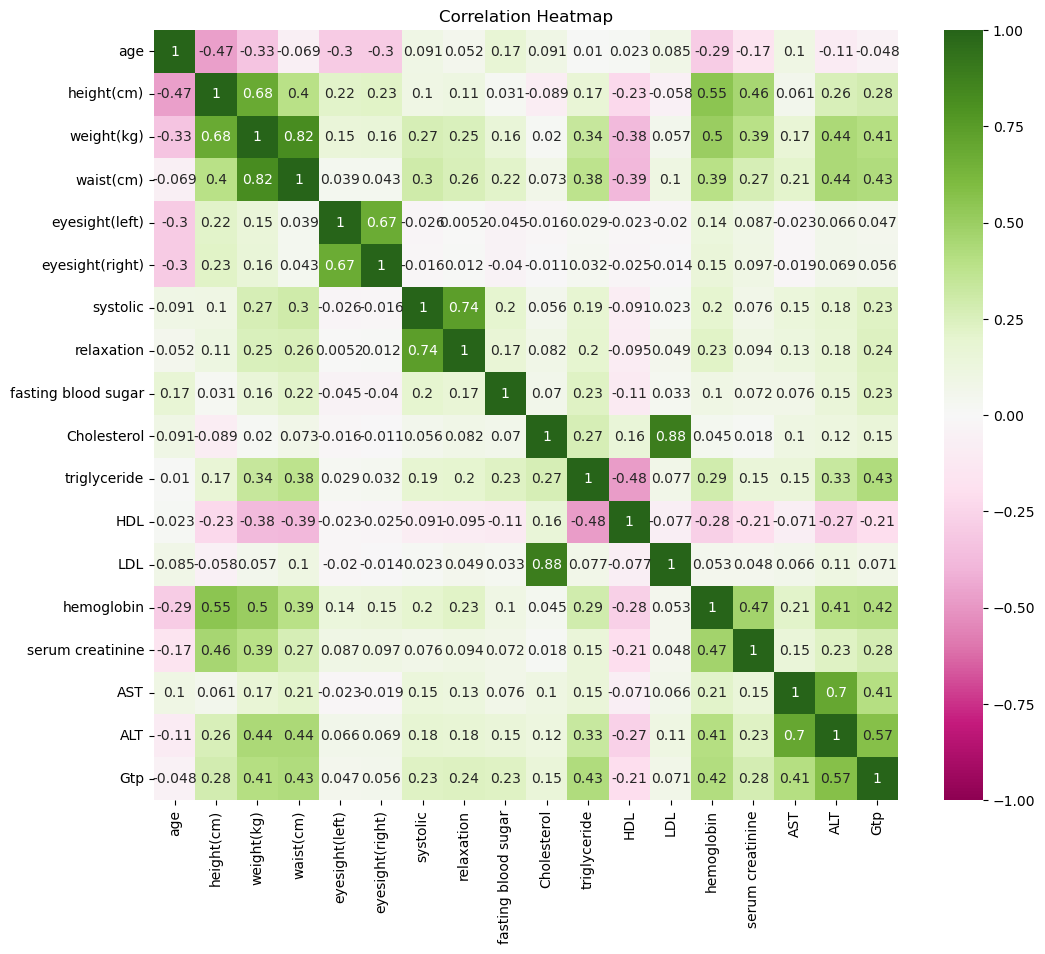

In [24]:
#Draw a correlation plot(heatmap) to identify the corelaion between each variable
#Plot the corelation corplot
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



## Check for the relationship of Smoking column with the other columns

Then I drew histograms and bar plots to check the relationship between my target variable and the other numerical and categorical variables.Based on the histograms depicting the relationship between numerical variables and the target variable "smoking.
1. At age 35, there is a higher prevalence of smokers compared to non-smokers, and the highest proportion of smokers is observed at age 40.
  	2. There is a tendency for smoking to increase as height increases.	
3. Individuals with higher weights tend to have a higher prevalence of smoking, and the number of smokers among those with high weight is greater than non-smokers.
4. Similarly, smoking tends to increase with increasing waist size, and there are more smokers among those with larger waist sizes compared to non-smokers.	
5. Individuals with lower HDL levels are more likely to be smokers.
6. There is a higher proportion of smokers among individuals with high triglyceride levels.
7. Smokers tend to have higher hemoglobin levels compared to non-smokers.
8. Individuals with high serum creatinine levels are more likely to be smokers.
9. Higher levels of ALT and GTP are observed more frequently among smokers.

I can also identify that most of the variables are skewed in the histograms. Some of them exhibit positive skewness, while others show negative skewness. Recognizing this skewness is an important insight I gained from analyzing these histograms.

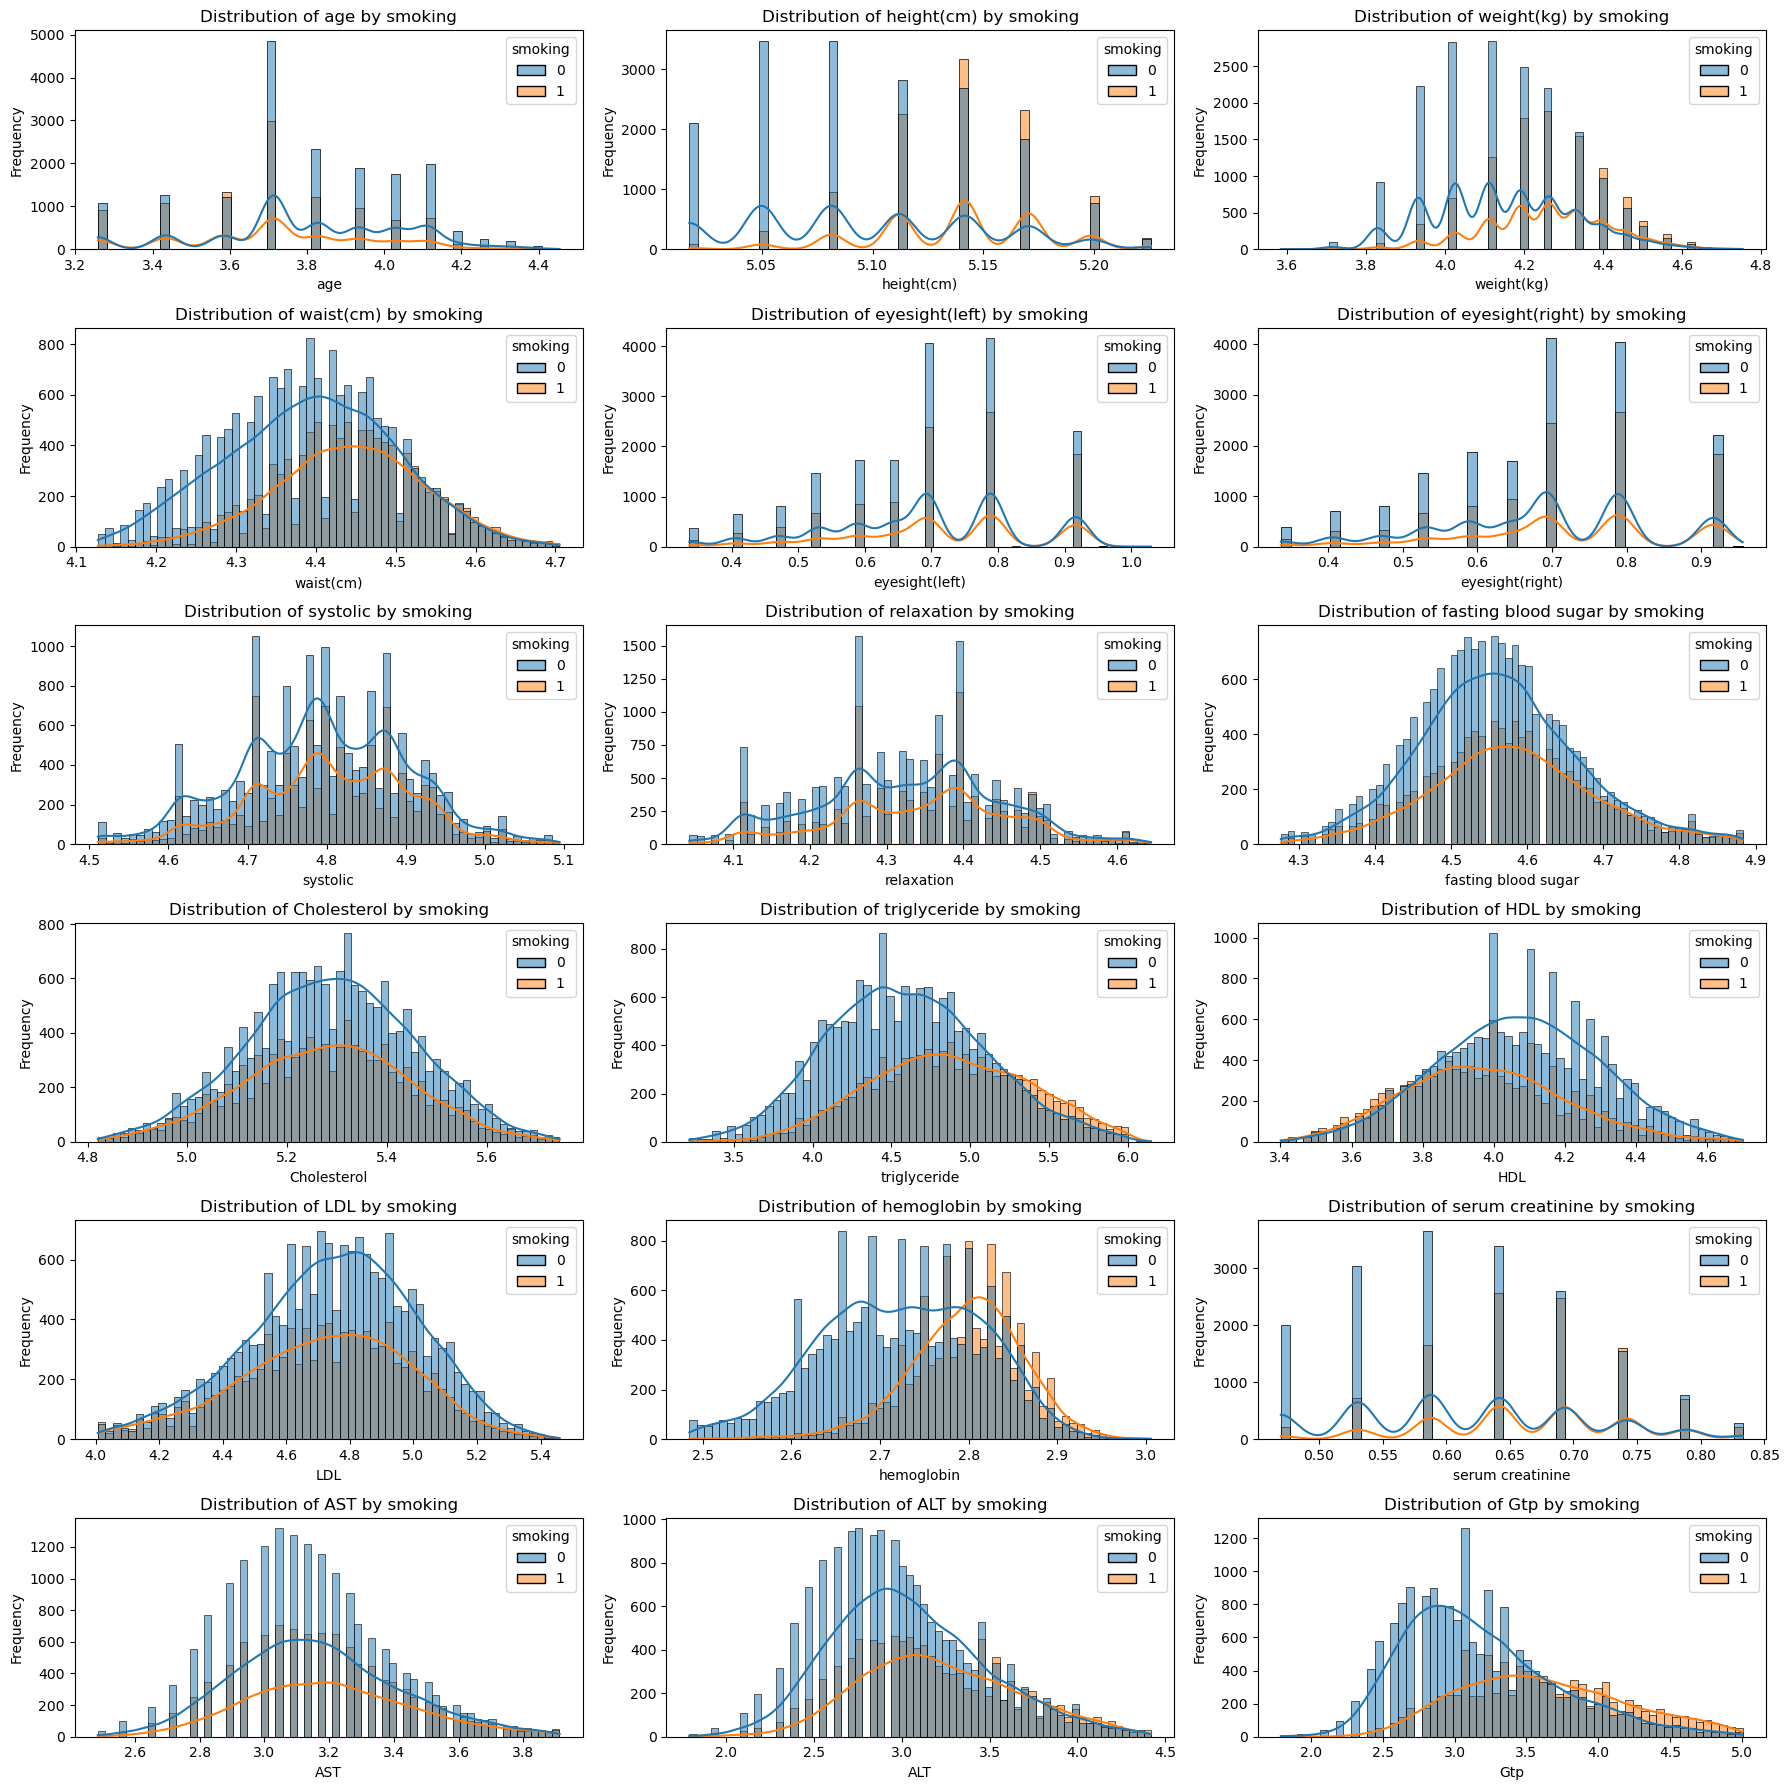

In [25]:
#Draw the plots to check the relationships with smoking with other columns
num_plots = len(numerical_columns)
num_rows = 6 
num_cols = 3  
 
# Create a grid layout for plotting histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
 
# Flatten the axes array to iterate over features
axes = axes.flatten()
 
# Plot histograms for each valid numerical feature
for i, feature in enumerate(numerical_columns):
    sns.histplot(data=df, x=feature, hue='smoking', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by smoking')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
 
#Turn off empty subplots if any
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')
 
#Adjust layout and spacing
plt.tight_layout()
plt.show()

Based on the bar charts illustrating the relationship between categorical variables and the target variable "Smoking," the following insights were observed:
1. Individuals with good hearing levels predominantly belong to the non-smoker category.
2. Non-smokers are more prevalent among individuals with low protein counts in urine
3. Non-smokers are predominantly those who do not have dental caries.
These observations highlight distinct associations between smoking behavior and certain categorical health indicators in the dataset.


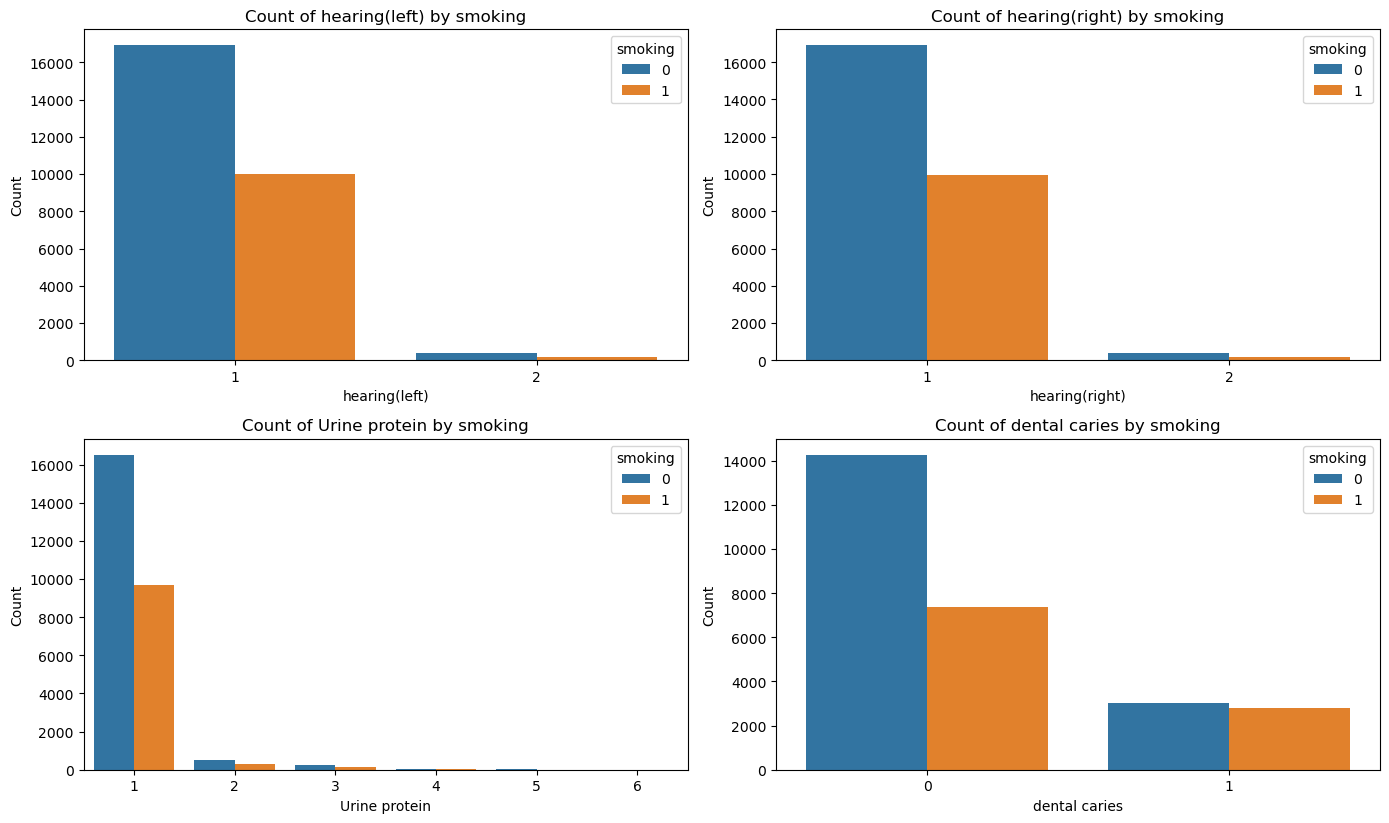

In [26]:
#Plotting count plots for categorical features
categorical_features = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']
 
plt.figure(figsize=(14, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=feature, hue='smoking')
    plt.title(f'Count of {feature} by smoking')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [27]:
df['smoking'].value_counts()

0    17322
1    10174
Name: smoking, dtype: int64

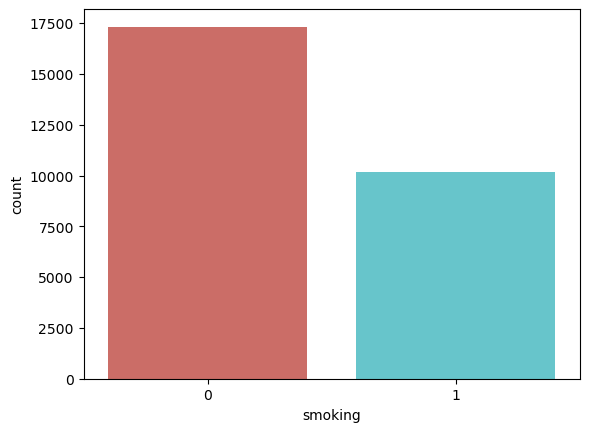

<Figure size 640x480 with 0 Axes>

In [28]:
sns.countplot(x='smoking',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

## convert the categorical variables to numerical

In [29]:
#Check for the data types
df.dtypes

age                     float64
height(cm)              float64
weight(kg)              float64
waist(cm)               float64
eyesight(left)          float64
eyesight(right)         float64
hearing(left)          category
hearing(right)         category
systolic                float64
relaxation              float64
fasting blood sugar     float64
Cholesterol             float64
triglyceride            float64
HDL                     float64
LDL                     float64
hemoglobin              float64
Urine protein          category
serum creatinine        float64
AST                     float64
ALT                     float64
Gtp                     float64
dental caries          category
smoking                category
dtype: object

In [30]:
#Convert the predictive variable into int
df['smoking'] = df['smoking'].astype(int)

In [31]:
#Check for the data types again
df.dtypes

age                     float64
height(cm)              float64
weight(kg)              float64
waist(cm)               float64
eyesight(left)          float64
eyesight(right)         float64
hearing(left)          category
hearing(right)         category
systolic                float64
relaxation              float64
fasting blood sugar     float64
Cholesterol             float64
triglyceride            float64
HDL                     float64
LDL                     float64
hemoglobin              float64
Urine protein          category
serum creatinine        float64
AST                     float64
ALT                     float64
Gtp                     float64
dental caries          category
smoking                   int32
dtype: object

In [32]:
# Apply one hot encoding
df1=pd.get_dummies(df,columns=[ 'hearing(left)', 'hearing(right)', 'Urine protein',
       'dental caries'],drop_first=True)
print (df1.shape)
df1.head()

(27496, 27)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Gtp,smoking,hearing(left)_2,hearing(right)_2,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_1
5,4.110874,5.081404,3.931826,4.369448,0.693147,0.641854,4.844187,4.330733,4.744932,5.181784,...,4.262680,1,1,1,0,0,0,0,0,0
6,3.713572,5.170484,4.510860,4.564348,0.641854,0.693147,4.875197,4.488636,4.510860,5.337538,...,2.995732,0,0,0,0,0,0,0,0,0
9,3.828641,5.049856,4.025352,4.369448,0.530628,0.693147,4.744932,4.406719,4.574711,5.220356,...,4.043051,0,0,0,0,0,0,0,0,0
11,3.931826,5.049856,3.931826,4.290459,0.405465,0.587787,4.727388,4.174387,4.430817,4.912655,...,2.484907,0,0,0,0,0,0,0,0,0
12,3.931826,5.081404,4.110874,4.499810,0.587787,0.587787,4.836282,4.343805,4.584967,5.337538,...,2.397895,0,0,0,0,0,0,0,0,1


In [33]:
#Check for the data types again to confirm that all the variables are numerical
df1.dtypes

age                    float64
height(cm)             float64
weight(kg)             float64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
smoking                  int32
hearing(left)_2          uint8
hearing(right)_2         uint8
Urine protein_2          uint8
Urine protein_3          uint8
Urine protein_4          uint8
Urine protein_5          uint8
Urine protein_6          uint8
dental caries_1          uint8
dtype: object

### Balance the class distribution using SMOTE

Before creating the model the two categories in the predictive variable should balanced. But according to the EDA done above , identified that both categories are imbalanced. So SMOTE method is used to balance the both cateories in the predictive variable.

In [34]:
#Count the percentage of two categories in the predictive variable
count_no_smok = len(df1[df1['smoking']==0])
count_smok = len(df1[df1['smoking']==1])
pct_of_no_smok = count_no_smok/(count_no_smok+count_smok)
print("percentage of no smoking is", pct_of_no_smok*100)
pct_of_smok = count_smok/(count_no_smok+count_smok)
print("percentage of smoking", pct_of_smok*100)

percentage of no smoking is 62.998254291533314
percentage of smoking 37.001745708466686


In [35]:
#Get the shape of the DataFrame
df1.shape

(27496, 27)

In [36]:
#pip install scikit-learn==1.2.2

In [37]:
#Balancining the two types of cateogories in the predictive variable by using oversampling
X = df1.loc[:, df1.columns != 'smoking']
y = df1.loc[:, df1.columns == 'smoking']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['smoking'])
# Check the numbers of data
print("length of oversampled data is ",len(os_data_X))
print("Number of no smoking in oversampled data",len(os_data_y[os_data_y['smoking']==0]))
print("Number of smoking",len(os_data_y[os_data_y['smoking']==1]))
print("Proportion of no smoking data in oversampled data is ",len(os_data_y[os_data_y['smoking']==0])/len(os_data_X))
print("Proportion of smoking data in oversampled data is ",len(os_data_y[os_data_y['smoking']==1])/len(os_data_X))

length of oversampled data is  24198
Number of no smoking in oversampled data 12099
Number of smoking 12099
Proportion of no smoking data in oversampled data is  0.5
Proportion of smoking data in oversampled data is  0.5


In [38]:
os_data_X["smoking"]=os_data_y
df2=os_data_X
print(df2.shape)
df2.head()

(24198, 27)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Gtp,hearing(left)_2,hearing(right)_2,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_1,smoking
0,3.713572,5.141664,4.394449,4.477337,0.587787,0.587787,4.934474,4.465908,4.543295,5.187386,...,3.401197,0,0,0,0,0,0,0,1,0
1,3.828641,5.049856,4.330733,4.488636,0.916291,0.916291,4.905275,4.430817,4.553877,5.429346,...,3.465736,0,0,0,0,0,0,0,0,1
2,3.713572,5.225747,4.330733,4.382027,0.693147,0.916291,4.744932,4.343805,4.691348,5.049856,...,3.178054,0,0,0,0,0,0,0,0,0
3,3.931826,5.141664,4.262680,4.515245,0.530628,0.693147,4.709530,4.110874,4.553877,4.919981,...,2.944439,0,0,0,0,0,0,0,0,0
4,3.931826,5.081404,4.262680,4.499810,0.693147,0.693147,4.919981,4.532599,4.543295,5.407172,...,4.634729,0,0,0,0,0,0,0,1,0


In [39]:
##Display the descriptive statistics for the new dataframe
df2.describe()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Gtp,hearing(left)_2,hearing(right)_2,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_1,smoking
count,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,...,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.000000,24198.00000
mean,3.761838,5.118389,4.204316,4.417865,0.701877,0.700153,4.798761,4.337416,4.571737,5.283071,...,3.393581,0.020622,0.022440,0.029755,0.012274,0.002562,0.000827,0.000041,0.223118,0.50000
std,0.247464,0.049697,0.173242,0.101314,0.139315,0.139711,0.099598,0.112509,0.105022,0.163031,...,0.592878,0.142117,0.148112,0.169913,0.110107,0.050554,0.028738,0.006429,0.416345,0.50001
min,3.258097,5.017280,3.583519,4.127134,0.336472,0.336472,4.510860,4.043051,4.276666,4.820282,...,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.583519,5.081404,4.110874,4.355076,0.607224,0.598673,4.727388,4.262680,4.499810,5.170484,...,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3.713572,5.117194,4.189655,4.419901,0.693147,0.693147,4.795791,4.343805,4.564453,5.283204,...,3.332205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000
75%,3.931826,5.151085,4.330733,4.488636,0.788457,0.788457,4.875197,4.407498,4.634729,5.393628,...,3.784190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,4.454347,5.225747,4.753590,4.705016,0.955511,0.955511,5.093750,4.644391,4.882802,5.743003,...,5.003946,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [40]:
#Check for the null values
df2.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
hearing(left)_2        0
hearing(right)_2       0
Urine protein_2        0
Urine protein_3        0
Urine protein_4        0
Urine protein_5        0
Urine protein_6        0
dental caries_1        0
smoking                0
dtype: int64

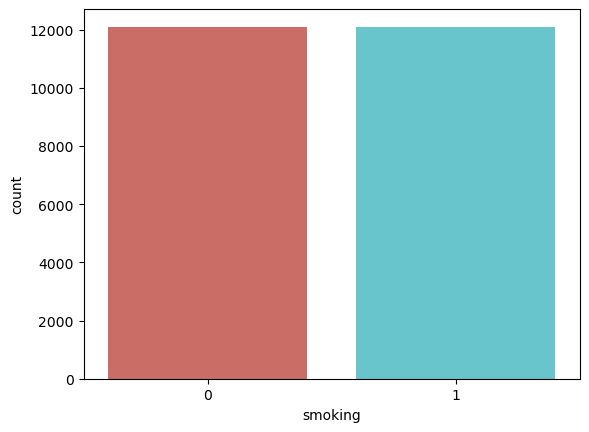

<Figure size 640x480 with 0 Axes>

In [41]:
sns.countplot(x='smoking',data=df2,palette='hls')
plt.show()
plt.savefig('count_plot')

## Logistic Regression

After balancing the predictive variable categories, first machine learning classifier is employed. First the Logistic Regression classifier was designed for whole dataset and then again logistic regression was developed for the features selected by significance method. Then the accuracy was increased and the cross validation was employed for this model and the model acuracy is increased again. Then the model validation tools like confusion matrix, classification report and AUC_ROC curve employed to evaluate the model performance.

In [42]:
#Get the variables of the dataset
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein_2', 'Urine protein_3', 'Urine protein_4', 'Urine protein_5', 'Urine protein_6', 'serum creatinine', 'AST', 'ALT', 'Gtp'] 
X=df2[cols]
y=df2['smoking']

In [43]:
#Implementation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
#Check for the accuracy of the  test dataset
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


### Feature Selection for Logistic Regression Using statistical Significance Method

In [45]:
#Get all the features of the dataset
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein_2','Urine protein_3','Urine protein_4','Urine protein_5','Urine protein_6', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'] 

In [46]:
# Define the list of all column names in the DataFrame
data_final_vars = df2.columns.values.tolist()

# Define the target variable and features
y = 'smoking'
X = [i for i in data_final_vars if i != y]

# Ensure os_data_X contains the features and os_data_y contains the target variable
data_X = df2[X]
data_y = df2[y]

# Instantiate the logistic regression estimator
logreg = LogisticRegression()

# Check the shape of os_data_X and os_data_y
print(f"data_X shape: {data_X.shape}")
print(f"data_y shape: {data_y.shape}")

# Create the RFE object with the logistic regression estimator and the number of features to select
try:
    rfe = RFE(estimator=logreg, n_features_to_select=27)
    # Fit the RFE object to your oversampled data
    rfe = rfe.fit(data_X, data_y.values.ravel())

    # Print the support and ranking of the features
    print(rfe.support_)
    print(rfe.ranking_)
except TypeError as e:
    print(f"TypeError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

data_X shape: (24198, 26)
data_y shape: (24198,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#Get the variables selected by 1st feature selection method
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein_2', 'Urine protein_3', 'Urine protein_4', 'Urine protein_5', 'Urine protein_6', 'serum creatinine', 'AST', 'ALT', 'Gtp'] 
X=df2[cols]
y=df2['smoking']
#get the most fitted variables for logistic regression model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


         Current function value: 0.534320
         Iterations: 35
                              Results: Logit
Model:                  Logit               Method:              MLE       
Dependent Variable:     smoking             Pseudo R-squared:    0.229     
Date:                   2024-08-25 19:27    AIC:                 25908.9519
No. Observations:       24198               BIC:                 26111.3026
Df Model:               24                  Log-Likelihood:      -12929.   
Df Residuals:           24173               LL-Null:             -16773.   
Converged:              0.0000              LLR p-value:         0.0000    
No. Iterations:         35.0000             Scale:               1.0000    
---------------------------------------------------------------------------
                     Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
---------------------------------------------------------------------------
age                  -0.0415    0.0766  -0.5414 0.588

C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
#Select the most fitted variables and check them again with the same method
cols=['height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(right)','hearing(right)_2', 'systolic',
       'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL','LDL','hemoglobin','Urine protein_3', 'serum creatinine', 'AST',
       'ALT', 'Gtp'] 
X=df2[cols]
y=df2['smoking']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.534513
         Iterations 6
                           Results: Logit
Model:               Logit             Method:            MLE       
Dependent Variable:  smoking           Pseudo R-squared:  0.229     
Date:                2024-08-25 19:27  AIC:               25902.3029
No. Observations:    24198             BIC:               26039.9013
Df Model:            16                Log-Likelihood:    -12934.   
Df Residuals:        24181             LL-Null:           -16773.   
Converged:           1.0000            LLR p-value:       0.0000    
No. Iterations:      6.0000            Scale:             1.0000    
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
height(cm)           1.8637   0.2572   7.2470 0.0000  1.3596  2.3677
weight(kg)           2.4129 

In [49]:
cols=['height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(right)','hearing(right)_2', 'systolic',
       'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL','LDL','hemoglobin','Urine protein_3', 'serum creatinine', 'AST',
       'ALT', 'Gtp'] 
X=df2[cols]
y=df2['smoking']

In [50]:
#Implementation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#Check for the accuracy of the  test dataset
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [52]:
# Using 10-fold cross-validation
scores = cross_val_score(logreg, X, y, cv=10)

# Displaying the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Cross-validation scores: [0.72603306 0.72644628 0.73016529 0.73181818 0.72603306 0.73099174
 0.7338843  0.72975207 0.74121538 0.73212071]
Mean accuracy: 0.7308460056235245
Standard deviation: 0.00432079774878427


C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\upekk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[[2442 1152]
 [ 846 2820]]


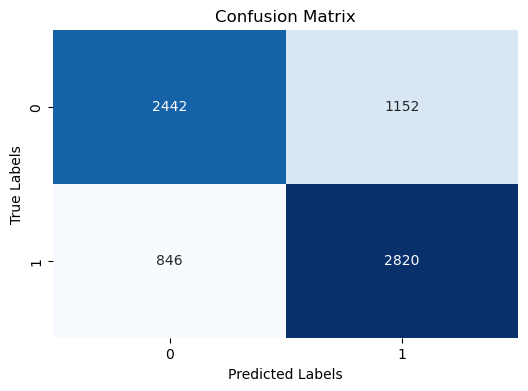

In [53]:
from sklearn.metrics import confusion_matrix
#Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
#Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      3594
           1       0.71      0.77      0.74      3666

    accuracy                           0.72      7260
   macro avg       0.73      0.72      0.72      7260
weighted avg       0.73      0.72      0.72      7260



In [60]:
#Get the total precission_score
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.7099697885196374


In [62]:
#Get the total recall_score
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.7692307692307693


In [63]:
#Get the total f1_score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.7384131971720345


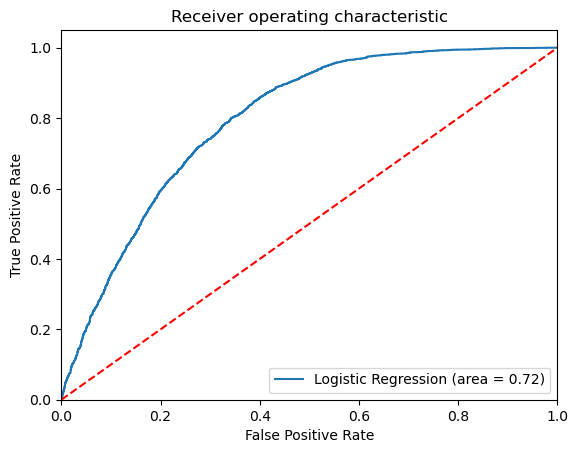

In [64]:
#Plotting the ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## DESCISSION TREE

Then Descission Tree classifier is employed. As done in the Logistic Regression classifier, first the model was designed for whole dataset and then again DT was developed for the features selected by tree based method. Then the accuracy was increased and the cross validation was employed for this model and the model acuracy is increased again. Then the model validation tools like confusion matrix, classification report and AUC_ROC curve employed to evaluate the model performance.

In [65]:
#Take all the variables of the original dataset
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein_2','Urine protein_3','Urine protein_4','Urine protein_5','Urine protein_6', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'] 
X=df2[cols]
y=df2['smoking']


In [66]:
#Model creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
#Test for the model accuracy
y_pred = model.predict(X_test)
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Decision Tree Classifier on test set: 75.79%


In [68]:
#Get the feature impratance of the variables
SMOKING_features = [x for i,x in enumerate(X.columns) if i!=len(X.columns)]
print("Feature importances:\n{}".format(model.feature_importances_))

Feature importances:
[0.04788204 0.26705256 0.0221302  0.0395076  0.02435168 0.02057775
 0.0016583  0.00142908 0.03328857 0.04008623 0.04135174 0.03696722
 0.05834051 0.04547577 0.04302472 0.08403816 0.00305982 0.00153113
 0.00033757 0.         0.         0.02662814 0.03978223 0.036902
 0.07968334 0.00491364]


In [69]:
#Get the feature importance by using an array
feature_labels = np.array(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein_2','Urine protein_3','Urine protein_4','Urine protein_5','Urine protein_6', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'])
importance =model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
 print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

height(cm)-26.71%
hemoglobin-8.40%
Gtp-7.97%
triglyceride-5.83%
age-4.79%
HDL-4.55%
LDL-4.30%
fasting blood sugar-4.14%
relaxation-4.01%
AST-3.98%
waist(cm)-3.95%
Cholesterol-3.70%
ALT-3.69%
systolic-3.33%
serum creatinine-2.66%
eyesight(left)-2.44%
weight(kg)-2.21%
eyesight(right)-2.06%
dental caries_1-0.49%
Urine protein_2-0.31%
hearing(left)_2-0.17%
Urine protein_3-0.15%
hearing(right)_2-0.14%
Urine protein_4-0.03%
Urine protein_5-0.00%
Urine protein_6-0.00%


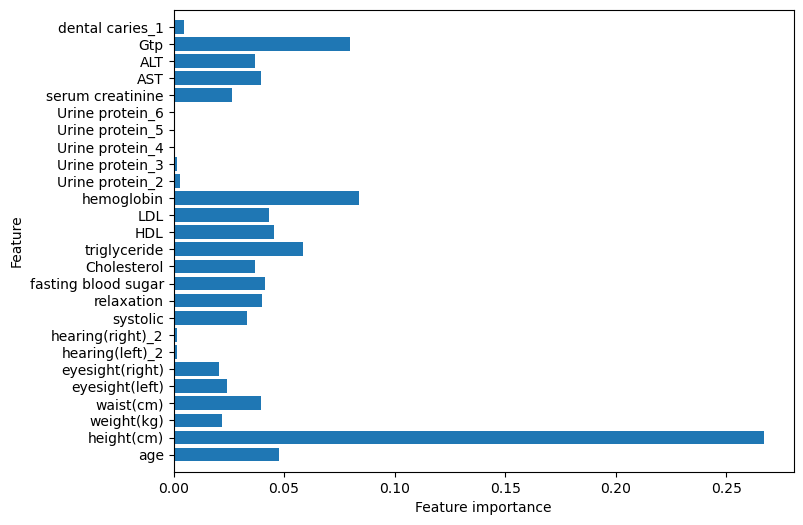

In [70]:
#Plot the bar chart to visualize the feature importance
def plot_feature_importances(model):
 plt.figure(figsize=(8,6))
 n_features = len(X.columns)
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), SMOKING_features)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)
 
plot_feature_importances(model)
plt.savefig('feature_importance')

In [71]:
#Select the most important features for creating the model again
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp'] 
X=df2[cols]
y=df2['smoking']

In [72]:
#Design the model again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
#Test for the model accuracy
y_pred = model.predict(X_test)
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Decision Tree Classifier on test set: 75.69%


In [74]:
# Using 10-fold cross-validation
scores = cross_val_score(model, X, y, cv=10)

# Displaying the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Cross-validation scores: [0.72024793 0.73140496 0.7107438  0.72272727 0.71404959 0.72231405
 0.83966942 0.84710744 0.8424969  0.83257544]
Mean accuracy: 0.7683336806753696
Standard deviation: 0.05921009834713993


[[2685  909]
 [ 856 2810]]


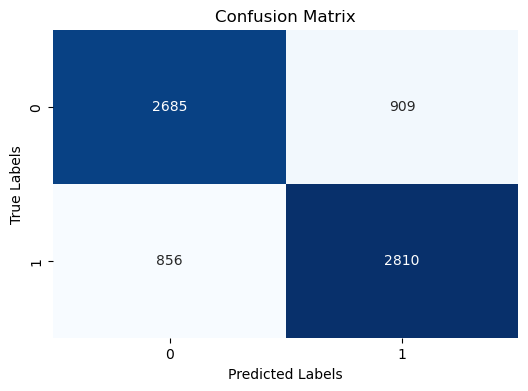

In [75]:
#Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [76]:
#Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      3594
           1       0.76      0.77      0.76      3666

    accuracy                           0.76      7260
   macro avg       0.76      0.76      0.76      7260
weighted avg       0.76      0.76      0.76      7260



In [77]:
#Get the total precission_score
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.7555794568432375


In [78]:
#Get the total recall_score
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.7665030005455538


In [79]:
#Get the total f1_score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.7610020311442112


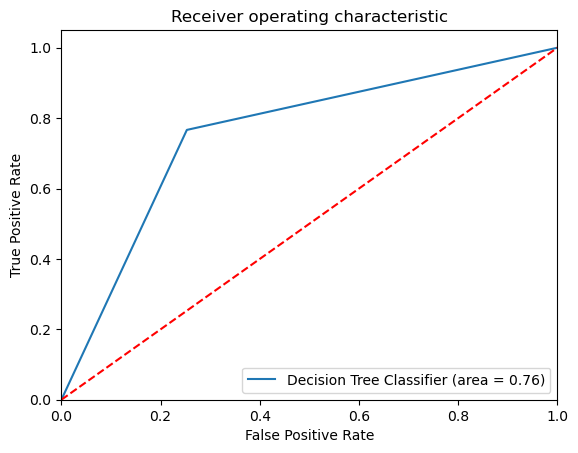

In [80]:
#Plot the ROC Curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()



## Random Forest classifier

Then the third machine learning classifier, Random Forest was employed. As done in previous models,the Random forest classifier was designed for whole dataset and then again Random forest was developed for the features selected by significance method. Then the accuracy was increased and the cross validation was employed for this model and the model acuracy is increased again. Then the model validation tools like confusion matrix, classification report and AUC_ROC curve employed to evaluate the model performance.

In [81]:
#Get all the features of the dataset
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein_2','Urine protein_3','Urine protein_4','Urine protein_5','Urine protein_6', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'] 
X=df2[cols]
y=df2['smoking']

In [82]:
#Create the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
#Check for the accuracy
y_pred = rf_classifier.predict(X_test)
print("\033[1m Accuracy of Random Forest Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Random Forest Classifier on test set: 81.18%


In [84]:
#Get the feature impratance of the variables
SMOKING_features = [x for i,x in enumerate(X.columns) if i!=len(X.columns)]
print("Feature importances:\n{}".format(rf_classifier.feature_importances_))

Feature importances:
[4.40973208e-02 1.40003005e-01 5.16767012e-02 4.40795116e-02
 2.64041838e-02 2.82808730e-02 1.47977219e-03 1.59778440e-03
 3.98290874e-02 3.79951754e-02 4.02590911e-02 4.29570296e-02
 6.03896979e-02 4.64830673e-02 4.38050763e-02 1.11840445e-01
 2.13258433e-03 1.12094563e-03 2.92031638e-04 1.20077787e-04
 4.86200361e-06 5.35158744e-02 3.93540149e-02 4.40045203e-02
 9.06301184e-02 7.64714810e-03]


In [85]:
#Get the feature importance by using an array
feature_labels = np.array(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein_2','Urine protein_3','Urine protein_4','Urine protein_5','Urine protein_6', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'])
importance =rf_classifier.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
 print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

height(cm)-14.00%
hemoglobin-11.18%
Gtp-9.06%
triglyceride-6.04%
serum creatinine-5.35%
weight(kg)-5.17%
HDL-4.65%
age-4.41%
waist(cm)-4.41%
ALT-4.40%
LDL-4.38%
Cholesterol-4.30%
fasting blood sugar-4.03%
systolic-3.98%
AST-3.94%
relaxation-3.80%
eyesight(right)-2.83%
eyesight(left)-2.64%
dental caries_1-0.76%
Urine protein_2-0.21%
hearing(right)_2-0.16%
hearing(left)_2-0.15%
Urine protein_3-0.11%
Urine protein_4-0.03%
Urine protein_5-0.01%
Urine protein_6-0.00%


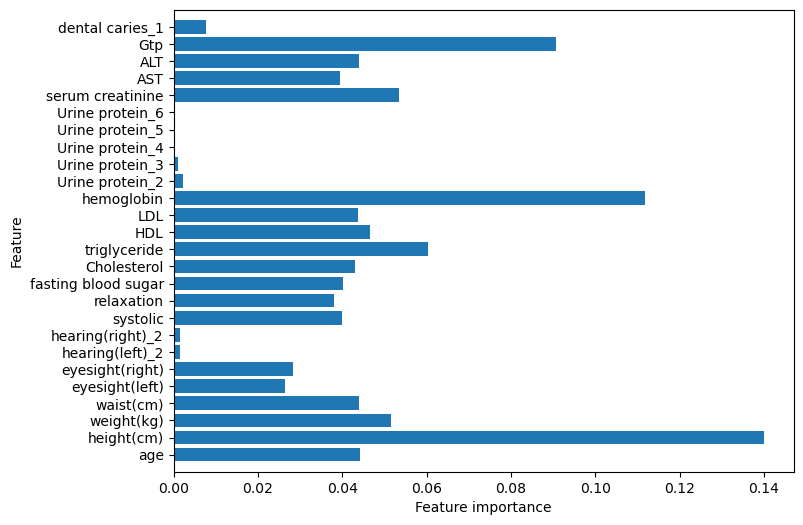

In [86]:
#Plot the bar chart to visualize the feature importance
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), SMOKING_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
 
plot_feature_importances(rf_classifier)
plt.savefig('feature_importance')

In [87]:
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)','systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'] 
X=df2[cols]
y=df2['smoking']

In [88]:
#Create the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
#Check for the accuracy
y_pred = rf_classifier.predict(X_test)
print("\033[1m Accuracy of Random Forest Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Random Forest Classifier on test set: 81.27%


In [90]:
# Using 10-fold cross-validation
scores = cross_val_score(rf_classifier, X, y, cv=10)

# Displaying the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


Cross-validation scores: [0.79876033 0.79834711 0.78305785 0.80247934 0.79669421 0.80909091
 0.88264463 0.87975207 0.88507648 0.87391484]
Mean accuracy: 0.8309817765007738
Standard deviation: 0.0408463680650728


[[2678  916]
 [ 444 3222]]


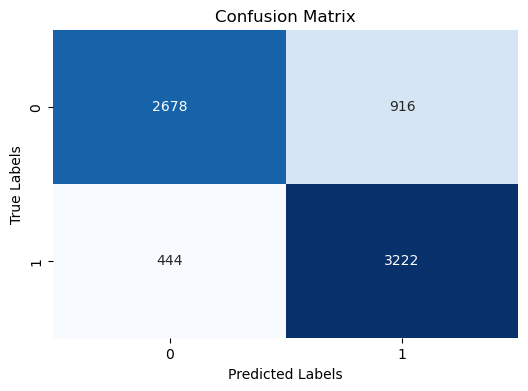

In [91]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
#Calculate the classification report
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      3594
           1       0.78      0.88      0.83      3666

    accuracy                           0.81      7260
   macro avg       0.82      0.81      0.81      7260
weighted avg       0.82      0.81      0.81      7260



In [93]:
#Get the total precission_score
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.7786370227162881


In [94]:
#Get the total recall_score
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.8788870703764321


In [95]:
#Get the total f1_score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.8257303946694003


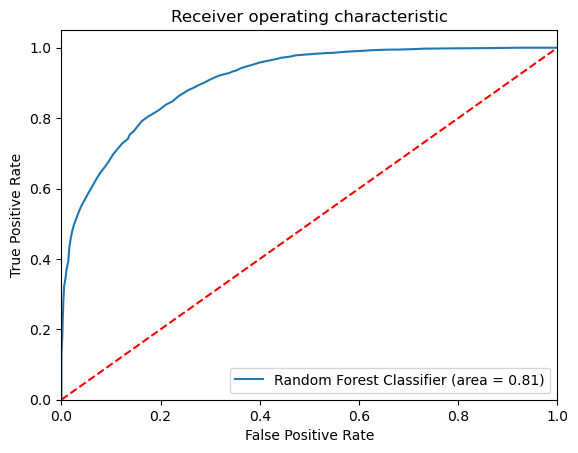

In [96]:
#Plot the ROC Curve
model_roc_auc = roc_auc_score(y_test, rf_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## SVM

Finally, the fourth machine learning classifier,SVM was employed. As done in previous models,the SVM classifier was designed for whole dataset and then again SVM was developed for the features selected by significance method. Then the accuracy was increased and the cross validation was employed for this model and the model acuracy is increased again. Then the model validation tools like confusion matrix, classification report and AUC_ROC curve employed to evaluate the model performance.Here after the features seleted by Recursive Feature elimination, the model's accuracy was decreased so the cross validation was done for the dataset with whole variables.

In [111]:
#Take all the variables of the original dataset
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein_2','Urine protein_3','Urine protein_4','Urine protein_5','Urine protein_6', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'] 
X=df2[cols]
y=df2['smoking']

In [112]:
#Design the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [113]:
#Get the model accuracy
y_pred = clf.predict(X_test)
print("\033[1m Accuracy of SVM on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of SVM on test set: 74.21%


Number of features with the highest accuracy: 26
Highest accuracy achieved: 0.8118457300275482
Best feature set: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)_2', 'hearing(right)_2', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein_2', 'Urine protein_3', 'Urine protein_4', 'Urine protein_5', 'Urine protein_6', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries_1']


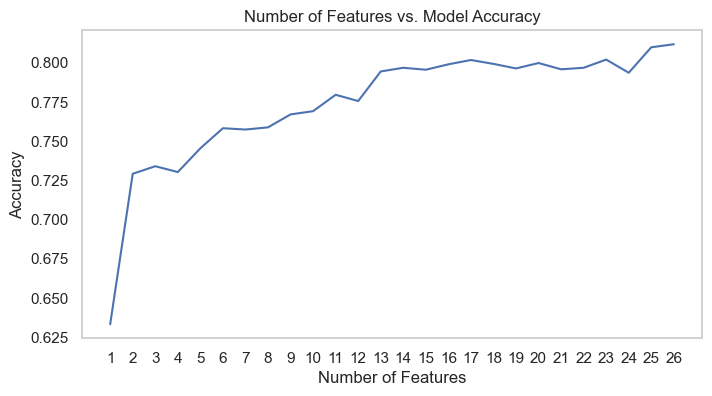

In [104]:
# df2 is my DataFrame and 'smoking' is the target variable
X = df2[cols]  
y = df2['smoking']

# List of different numbers of features to test
n_features_list = range(1, len(X.columns) + 1)

results = []
feature_sets = []

for n_features in n_features_list:
    # Select 'n_features' columns from the DataFrame
    selected_features = X.iloc[:, :n_features]
    selected_feature_names = X.columns[:n_features]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.3, random_state=42)
    
    # Initialize and train a RandomForestClassifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Evaluate accuracy on the test set
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results and feature names
    results.append({'n_features': n_features, 'accuracy': accuracy})
    feature_sets.append(list(selected_feature_names))

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find the number of features with the highest accuracy
best_n_features = results_df.loc[results_df['accuracy'].idxmax(), 'n_features']
best_accuracy = results_df['accuracy'].max()

print("Number of features with the highest accuracy:", best_n_features)
print("Highest accuracy achieved:", best_accuracy)

# Get the best feature set
best_feature_set = feature_sets[best_n_features - 1]
print("Best feature set:", best_feature_set)

# Plotting number of features vs. accuracy
sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))
plt.plot(results_df['n_features'], results_df['accuracy'], linestyle='-')
plt.title('Number of Features vs. Model Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks(results_df['n_features'])
plt.grid(False)
plt.show()

From the Recursive feature elimination method it showed to take every variables without elimination any variable for SVM classifier. So the cross validation is done for previously created model with all variables. 

In [114]:
from sklearn.datasets import make_classification
# Using 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)

# Displaying the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


Cross-validation scores: [0.74380165 0.73884298 0.74090909 0.74297521 0.73719008 0.74917355
 0.74793388 0.7607438  0.75692435 0.74617611]
Mean accuracy: 0.7464670702667247
Standard deviation: 0.007191098753975302


[[2235 1359]
 [ 513 3153]]


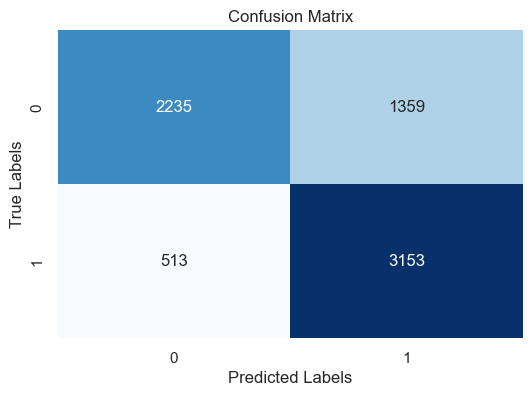

In [115]:
#Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
#Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      3594
           1       0.70      0.86      0.77      3666

    accuracy                           0.74      7260
   macro avg       0.76      0.74      0.74      7260
weighted avg       0.76      0.74      0.74      7260



In [117]:
#Get the total precission_score
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.6988031914893617


In [118]:
#Get the total recall_score
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.8600654664484452


In [119]:
#Get the total f1_score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.7710931768158473


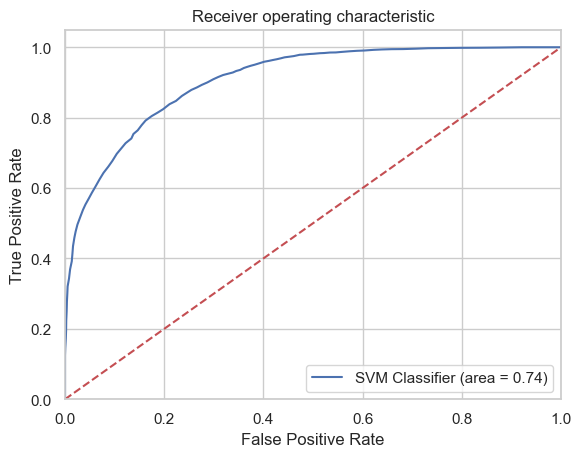

In [120]:
#Plot the ROC Curve
model_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## Hyperparameter Tuning

From the models I have created ,the highest accuracy is achieved by Random forest Classifier model.So I have selected it as the final model for my predictive model.

In [121]:
cols=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)','systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries_1'] 
X=df2[cols]
y=df2['smoking']

In [122]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Use the best model for prediction
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")
print(f"Test set accuracy with best model: {accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation accuracy: 0.8192
Test set accuracy with best model: 0.8098


In [123]:
#Design the model again with the model parameters which were taken by hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_depth=None, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [124]:
#Calculate the model accuracy again
y_pred = rfc.predict(X_test)
print("\033[1m Accuracy of Random Forest Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Random Forest Classifier on test set: 80.98%


In [125]:
#Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2665  929]
 [ 452 3214]]


In [126]:
#Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      3594
           1       0.78      0.88      0.82      3666

    accuracy                           0.81      7260
   macro avg       0.82      0.81      0.81      7260
weighted avg       0.81      0.81      0.81      7260



In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, 
                                   n_iter=50, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   verbose=2, 
                                   random_state=42)

# Run multiple times to mitigate randomness
num_runs = 5
best_scores = []
best_params_list = []

for _ in range(num_runs):
    random_search.fit(X_train, y_train)
    best_scores.append(random_search.best_score_)
    best_params_list.append(random_search.best_params_)

# Calculate the average best cross-validation score
average_best_score = np.mean(best_scores)

# Select the best parameters from multiple runs
best_params = best_params_list[np.argmax(best_scores)]
best_model = RandomForestClassifier(**best_params, random_state=42)

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Use the best model for prediction on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Best parameters from multiple runs: {best_params}")
print(f"Average best cross-validation accuracy over {num_runs} runs: {average_best_score:.4f}")
print(f"Test set accuracy with the best model: {accuracy:.4f}")
